In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the device to use (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Set the path to your dataset
dataset_dir = ""

# Set the input size for resizing the images
input_size = (128,128)

# Define the transformation to be applied to the images
transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
])

In [3]:
# Load the training dataset
train_dataset = ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load the test dataset
test_dataset = ImageFolder(root=os.path.join(dataset_dir, 'test'), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
# Load the pre-trained ResNet model
model = resnet18(pretrained=True)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

c:\Users\Alvin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alvin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:

# Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0.0
#     train_correct = 0

#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()

#         outputs = model(images)
#         _, predicted = torch.max(outputs, 1)
#         train_correct += (predicted == labels).sum().item()

#         loss = criterion(outputs, labels)
#         train_loss += loss.item()

#         loss.backward()
#         optimizer.step()

#     train_accuracy = train_correct / len(train_dataset)
#     train_loss /= len(train_loader)

#     # Evaluation on the test set
#     model.eval()
#     test_correct = 0

#     with torch.no_grad():
#         for images, labels in test_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             outputs = model(images)
#             _, predicted = torch.max(outputs, 1)
#             test_correct += (predicted == labels).sum().item()

#     test_accuracy = test_correct / len(test_dataset)

#     print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Accuracy: {train_accuracy:.4f} Test Accuracy: {test_accuracy:.4f}")

In [6]:
# Path for the saved model
path = './models/resnet18.pt'
# torch.save(model.state_dict(), path)

In [7]:
# Calculate the final accuracy on the entire test dataset
model.load_state_dict(torch.load(path))
model.eval()
test_correct = 0

preds_tensor = torch.Tensor()
labels_tensor = torch.Tensor()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        preds_tensor = torch.cat((preds_tensor, predicted))
        labels_tensor = torch.cat((labels_tensor, labels))
        test_correct += (predicted == labels).sum().item()

final_test_accuracy = test_correct / len(test_dataset)
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Final Test Accuracy: 0.9833


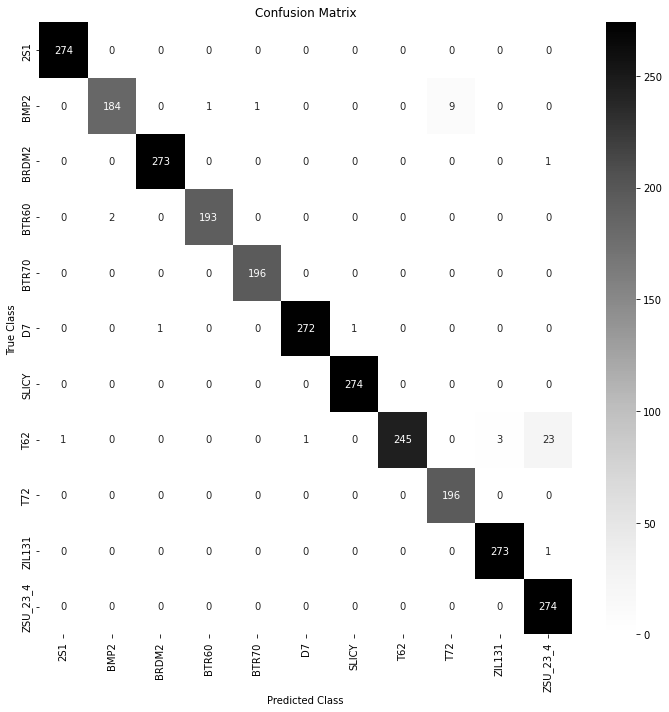

In [8]:
preds = preds_tensor.numpy()
actual = labels_tensor.numpy()

# Define the mapping dictionary
class_mapping = {
    0: '2S1',
    1: 'BMP2',
    2: 'BRDM2',
    3: 'BTR60',
    4: 'BTR70',
    5: 'D7',
    6: 'SLICY',
    7: 'T62',
    8: 'T72',
    9: 'ZIL131',
    10: 'ZSU_23_4'
}

y_preds = np.array([class_mapping[value] for value in preds])
y_true = np.array([class_mapping[value] for value in actual])

class_labels = ['2S1', 'BMP2', 'BRDM2', 'BTR60', 'BTR70', 'D7', 'SLICY', 'T62', 'T72', 'ZIL131', 'ZSU_23_4']

# Create the confusion matrix
cm = confusion_matrix(y_true, y_preds, labels=class_labels)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Configure figure properties
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()

# Show the figure
plt.show()


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

classification_report(y_true, y_preds, labels=class_labels, output_dict=True)

{'2S1': {'precision': 0.9963636363636363,
  'recall': 1.0,
  'f1-score': 0.9981785063752276,
  'support': 274},
 'BMP2': {'precision': 0.989247311827957,
  'recall': 0.9435897435897436,
  'f1-score': 0.9658792650918635,
  'support': 195},
 'BRDM2': {'precision': 0.9963503649635036,
  'recall': 0.9963503649635036,
  'f1-score': 0.9963503649635036,
  'support': 274},
 'BTR60': {'precision': 0.9948453608247423,
  'recall': 0.9897435897435898,
  'f1-score': 0.9922879177377892,
  'support': 195},
 'BTR70': {'precision': 0.9949238578680203,
  'recall': 1.0,
  'f1-score': 0.9974554707379135,
  'support': 196},
 'D7': {'precision': 0.9963369963369964,
  'recall': 0.9927007299270073,
  'f1-score': 0.9945155393053016,
  'support': 274},
 'SLICY': {'precision': 0.9963636363636363,
  'recall': 1.0,
  'f1-score': 0.9981785063752276,
  'support': 274},
 'T62': {'precision': 1.0,
  'recall': 0.8974358974358975,
  'f1-score': 0.945945945945946,
  'support': 273},
 'T72': {'precision': 0.95609756097560

In [10]:
matrix = confusion_matrix(y_true, y_preds, labels=class_labels)
class_wise_accuracies = matrix.diagonal()/matrix.sum(axis=1)

#Display the class-wise accuracies
for i, accuracy in enumerate(class_wise_accuracies):
    label = class_labels[i]
    print(f'Accuracy of class {label}: {accuracy:.2%}')


Accuracy of class 2S1: 100.00%
Accuracy of class BMP2: 94.36%
Accuracy of class BRDM2: 99.64%
Accuracy of class BTR60: 98.97%
Accuracy of class BTR70: 100.00%
Accuracy of class D7: 99.27%
Accuracy of class SLICY: 100.00%
Accuracy of class T62: 89.74%
Accuracy of class T72: 100.00%
Accuracy of class ZIL131: 99.64%
Accuracy of class ZSU_23_4: 100.00%


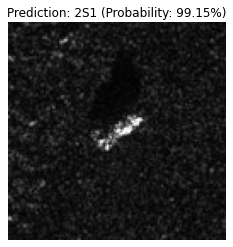

2S1: 99.15%
BMP2: 0.00%
BRDM2: 0.01%
BTR60: 0.30%
BTR70: 0.52%
D7: 0.00%
SLICY: 0.00%
T62: 0.02%
T72: 0.00%
ZIL131: 0.00%
ZSU_23_4: 0.00%


In [11]:
import numpy as np
from PIL import Image

class_names = train_dataset.classes
# Prediction on a single image
def predict_single_image(image, model, device, transform, class_names):
    model.eval()

    if isinstance(image, str):  # If image is a file path, load it using PIL
        image = Image.open(image)

    # If the image has only one channel, convert it to RGB
    if image.mode == 'L':
        image = image.convert('RGB')

    # Resize the image to the desired input size
    image = image.resize((128, 128))

    # Convert the image to a NumPy array and normalize the values
    image = np.array(image, dtype=np.float32) / 255.0

    # Convert the NumPy array to a PyTorch tensor
    image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)
        probability = torch.softmax(output, dim=1)[0] * 100

    class_name = class_names[predicted_class.item()]
    probability_percent = probability[predicted_class.item()].item()

    # Get probabilities for all classes
    all_probabilities = probability.cpu().numpy()

    # Create a dictionary to store class probabilities
    class_probabilities = {class_names[i]: prob.item(
    ) for i, prob in enumerate(all_probabilities)}

    plt.imshow(np.transpose(image.squeeze().cpu().numpy(), (1, 2, 0)))
    plt.title(
        f"Prediction: {class_name} (Probability: {probability_percent:.2f}%)")
    plt.axis('off')
    plt.show()

    return class_probabilities


# Get prediction for a user-input image
# Replace with the actual file name of the image
user_input_image = "test/2S1/HB14945.jpeg"
class_probabilities = predict_single_image(
    user_input_image, model, device, transform, class_names)

# Print probabilities of all classes
for class_name, probability in class_probabilities.items():
    print(f"{class_name}: {probability:.2f}%")